## In case of missing in IDs
HN API returns set of last 500 IDs of stories  
Due to few occurred downtimes in collecting of IDs there are gaps, where we don't know which are IDs of stories

### Find gaps
After collecting ~57K IDs with rather a few gaps occured, we can find average difference between consequent post IDs with relative confidence.

Having this stats we can say, that abnormal differences between two consequent IDs is the place of happened downtime

#### Conclusion
Add refetch routine to grabber (if returned 500 IDs)

In [828]:
import pandas as pd
import numpy as np
import time

In [841]:
ids = pd.read_csv("all_stories_ids.csv", sep=',', header=None)

In [842]:
ids

,0
0,20832555
1,20832570
2,20832573
3,20832577
4,20832593
...,...
66594,21534674
66595,21534676
66596,21534677
66597,21534680


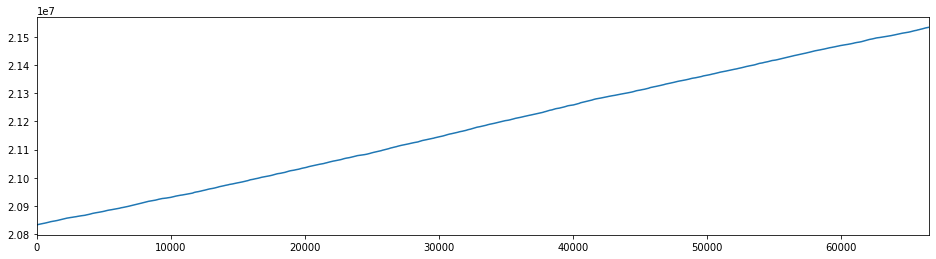

In [843]:
ids.plot(figsize=(16, 4), legend=False, kind="line")

In [844]:
ids.mean()

0    2.118274e+07
dtype: float64

In [845]:
diff = ids.diff()
diff

,0
0,NaN
1,15.0
2,3.0
3,4.0
4,16.0
...,...
66594,2.0
66595,2.0
66596,1.0
66597,3.0


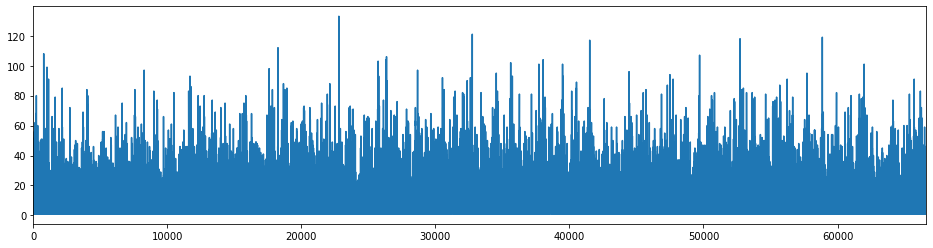

In [846]:
diff.plot(figsize=(16, 4), legend=False, kind="line")

In [847]:
diff.describe()

,0
count,66598.000000
mean,10.542809
std,10.814486
min,1.000000
25%,3.000000
50%,7.000000
75%,14.000000
max,133.000000


,1,2,3,4,5,7,8,10,11,12,...,66582,66584,66585,66587,66589,66590,66591,66593,66597,66598
0,15.0,3.0,4.0,16.0,15.0,5.0,16.0,24.0,9.0,8.0,...,4.0,6.0,7.0,4.0,9.0,5.0,10.0,6.0,3.0,5.0


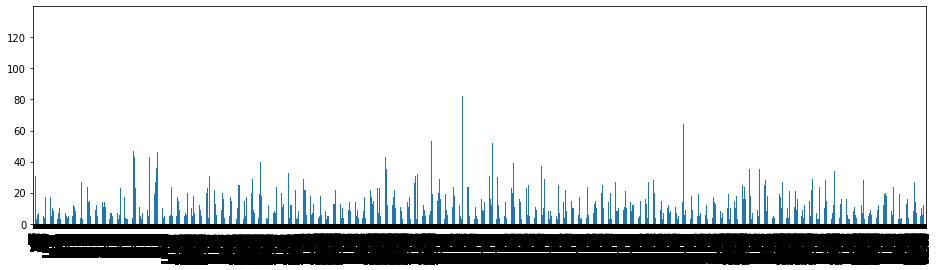

In [848]:
peaks = diff[diff >= diff.skew()].dropna()
peaks.plot(figsize=(16, 4), legend=False, kind="bar")
peaks.transpose()

### Prepare ranges (gaps)

In [820]:
ranges = []
for index, row in peaks.iterrows():
    i = int(row[0])
    top = ids.iloc[index][0]
    ranges.append(range(top-i+1, top))

In [821]:
ranges.sort(key=len)

In [822]:
print(peaks.sum()[0])

50576.0


### Fetch, check and save missing IDs
Check every missing ID and update list. Store fetched post data, to avoid re-fetching of 
stored data on next steps 

In [823]:
items = {}

In [824]:
import requests
def get_item(id):
    url = 'https://hacker-news.firebaseio.com/v0/item/' + str(id) + '.json?print=pretty'
    r = requests.get(url)
    r.raise_for_status()
    return r.json()

In [825]:
for el in ranges:
    print(len(el))

1660
5170
5638
7368
12570
18164


In [826]:
# failed_requests = []
# for i in ranges[0][2490:2500]:
#     try:
#         res = get_item(i)
#     except requests.RequestException as e:
#         failed_requests.append(i)
#     else:
#         print(i)
        
# print(failed_requests)

In [829]:
print("Start fetch:", time.ctime(time.time()))

failed_requests = []

for range_to_go in ranges:
    print("======================")
    range_len = len(range_to_go)-1
    print("IDs to go:", range_len)
    message = ""
    passed = 0
    for i in range_to_go:
        print("*"*int((passed/range_len)*10) + "_"*int(((range_len-passed)/range_len)*10) + " | " + str(passed) + " |" + message, end="\r")
        passed += 1
        time.sleep(0.1)
        try:
            item = get_item(i)
        except requests.RequestException as e:
            failed_requests.append(i)
        else:
            if item != None and item["type"] == "story":
                if i not in items:
                    print("added: " + str(i))
                    items[i] = item

print("\nEnd fetch:", time.ctime(time.time()))
print("failed_requests:", end="")
print(failed_requests)

Start fetch: Thu Nov 14 05:12:34 2019
IDs to go: 1659
added: 21082143|
added: 21082154|
added: 21082181|
added: 21082182|
added: 21082183|
added: 21082184|
added: 21082185|
added: 21082191|
added: 21082195|
added: 21082199|
added: 21082207|
added: 21082215|
added: 21082220|
added: 21082235 |
added: 21082257 |
added: 21082263 |
added: 21082275 |
added: 21082285 |
added: 21082309 |
added: 21082323 |
added: 21082324 |
added: 21082326 |
added: 21082330 |
added: 21082331 |
added: 21082350 |
added: 21082359 |
added: 21082366 |
added: 21082371 |
added: 21082374 |
added: 21082378 |
added: 21082381 |
added: 21082402 |
added: 21082415 |
added: 21082422 |
added: 21082423 |
added: 21082436 |
added: 21082451 |
added: 21082484 |
added: 21082500 |
added: 21082512 |
added: 21082519 |
added: 21082523 |
added: 21082527 |
added: 21082535 |
added: 21082540 |
added: 21082546 |
added: 21082550 |
added: 21082556 |
added: 21082558 |
added: 21082566 |
added: 21082568 |
added: 21082570 |
added: 21082593 |
added

added: 210265223 |
added: 210265278 |
added: 210265289 |
added: 210265478 |
added: 210265501 |
added: 210265589 |
added: 210265601 |
added: 210265645 |
added: 210265678 |
added: 210265767 |
added: 210265889 |
added: 210265890 |
added: 210265934 |
added: 210266012 |
added: 210266178 |
added: 210266223 |
added: 210266389 |
added: 210266412 |
added: 210266423 |
added: 210266490 |
added: 210266578 |
added: 210266801 |
added: 210266912 |
added: 210266923 |
added: 210266990 |
added: 210267123 |
added: 210267201 |
added: 210267234 |
added: 210267345 |
added: 210267678 |
added: 210267734 |
added: 210267767 |
added: 210267856 |
added: 210267945 |
added: 210267989 |
added: 210268089 |
added: 210268101 |
added: 210268190 |
added: 210268278 |
added: 210268623 |
added: 210268634 |
added: 210268712 |
added: 210268723 |
added: 210268790 |
added: 210268956 |
added: 210269023 |
added: 210269090 |
added: 210269334 |
added: 210269623 |
added: 210269678 |
added: 210269723 |
added: 210269889 |
added: 21026

added: 208628331 |
added: 208628342 |
added: 208628408 |
added: 208628431 |
added: 208628464 |
added: 208628508 |
added: 208628575 |
added: 208628619 |
added: 208628620 |
added: 208628631 |
added: 208628908 |
added: 208629019 |
added: 208629097 |
added: 208629242 |
added: 208629297 |
added: 208629375 |
added: 208629420 |
added: 208629864 |
added: 208630031 |
added: 208630142 |
added: 208630175 |
added: 208630197 |
added: 208630264 |
added: 208630320 |
added: 208630520 |
added: 208630842 |
added: 208630864 |
added: 208630919 |
added: 208630931 |
added: 208631008 |
added: 208631031 |
added: 208631108 |
added: 208631197 |
added: 208631220 |
added: 208631253 |
added: 208631319 |
added: 208631353 |
added: 208631397 |
added: 208631608 |
added: 208631653 |
added: 208631753 |
added: 208631786 |
added: 208631797 |
added: 208631864 |
added: 208631920 |
added: 208631986 |
added: 208632019 |
added: 208632053 |
added: 208632120 |
added: 208632219 |
added: 208632297 |
added: 208632331 |
added: 20863

added: 214940887 |
added: 214940998 |
added: 214941143 |
added: 214941187 |
added: 214941298 |
added: 214941309 |
added: 214941343 |
added: 214941476 |
added: 214941632 |
added: 214941754 |
added: 214942043 |
added: 214942154 |
added: 214942254 |
added: 214942309 |
added: 214942365 |
added: 214942465 |
added: 214942621 |
added: 214942743 |
added: 214942765 |
added: 214942943 |
added: 214942954 |
added: 214943010 |
added: 214943076 |
added: 214943110 |
added: 214943209 |
added: 214943265 |
added: 214943309 |
added: 214943410 |
added: 214943509 |
added: 214943576 |
added: 214943610 |
added: 214943732 |
added: 214943865 |
added: 214944009 |
added: 214944243 |
added: 214944376 |
added: 214944698 |
added: 214944910 |
added: 214944987 |
added: 214945021 |
added: 214945065 |
added: 214945109 |
added: 214945221 |
added: 214945232 |
added: 214945587 |
added: 214945965 |
added: 214946209 |
added: 214946376 |
added: 214946409 |
added: 214946410 |
added: 214946465 |
added: 214946732 |
added: 21494

added: 215010854 |
added: 215010887 |
added: 215011021 |
added: 215011143 |
added: 215011398 |
added: 215011409 |
added: 215011543 |
added: 215011632 |
added: 215011676 |
added: 2150119928 |
added: 2150123968 |
added: 2150125281 |
added: 2150125382 |
added: 2150126190 |
added: 2150126291 |
added: 2150126493 |
added: 2150127302 |
added: 2150129423 |
added: 2150130736 |
added: 2150130837 |
added: 2150131140 |
added: 2150132049 |
added: 2150132958 |
added: 2150134170 |
added: 2150135079 |
added: 2150135988 |
added: 2150137706 |
added: 2150138110 |
added: 2150138817 |
added: 2150139524 |
added: 2150140130 |
added: 2150141746 |
added: 2150142251 |
added: 2150142554 |
added: 2150145786 |
added: 2150146897 |
added: 2150146998 |
added: 2150147302 |
added: 2150147403 |
added: 2150147504 |
added: 2150149726 |
added: 2150150130 |
added: 2150150534 |
added: 2150153564 |
added: 2150155887 |
added: 2150156897 |
added: 2150158918 |
added: 2150160130 |
added: 2150160433 |
added: 2150161443 |
added: 21

added: 209292064 |
added: 209292120 |
added: 209292197 |
added: 209292253 |
added: 209292297 |
added: 209292520 |
added: 209292564 |
added: 209292631 |
added: 209292775 |
added: 209292886 |
added: 209292897 |
added: 209292975 |
added: 209292997 |
added: 209293020 |
added: 209293120 |
added: 209293364 |
added: 209293397 |
added: 209293497 |
added: 209293542 |
added: 209293675 |
added: 209293731 |
added: 209293742 |
added: 209294020 |
added: 209294053 |
added: 209294120 |
added: 209294153 |
added: 209294197 |
added: 209294353 |
added: 209294375 |
added: 209294675 |
added: 209294719 |
added: 209294820 |
added: 209294864 |
added: 209294919 |
added: 209294931 |
added: 209295386 |
added: 209295397 |
added: 209295408 |
added: 209295542 |
added: 209295586 |
added: 209295664 |
added: 209295720 |
added: 209295742 |
added: 209295775 |
added: 209295864 |
added: 209295920 |
added: 209295942 |
added: 209295964 |
added: 209295975 |
added: 209296019 |
added: 209296075 |
added: 209296120 |
added: 20929

added: 2093783543 |
added: 2093783644 |
added: 2093783745 |
added: 2093783947 |
added: 2093785361 |
added: 2093786371 |
added: 2093786573 |
added: 2093787482 |
added: 2093788391 |
added: 2093788593 |
added: 2093789200 |
added: 2093790008 |
added: 2093791321 |
added: 2093792028 |
added: 2093792129 |
added: 2093792331 |
added: 2093792634 |
added: 2093793644 |
added: 2093793745 |
added: 2093794452 |
added: 2093795058 |
added: 2093795159 |
added: 2093795260 |
added: 2093795462 |
added: 2093795563 |
added: 2093796674 |
added: 2093796977 |
added: 2093797179 |
added: 2093797482 |
added: 2093798694 |
added: 2093799604 |
added: 2093799907 |
added: 2093800210 |
added: 2093800311 |
added: 2093801119 |
added: 2093801220 |
added: 2093802533 |
added: 2093802634 |
added: 2093803139 |
added: 2093803442 |
added: 2093803644 |
added: 2093804957 |
added: 2093805361 |
added: 2093805765 |
added: 2093806371 |
added: 2093806674 |
added: 2093807381 |
added: 2093808391 |
added: 2093809199 |
added: 2093811220 |


In [830]:
len(items.keys())

5980

### Add missing IDs to main list

In [831]:
# load old file with newly added (by grabber) IDs
old = pd.read_csv("all_stories_ids.csv", sep=',', header=None)
print(len(old))

60619


In [832]:
# merge
new_data = old.append(pd.DataFrame(items.keys()))
print(len(new_data))

# leave only unique
new_data = new_data.drop_duplicates(keep='first')
print(len(new_data))

66599
66599


In [833]:
# sort
new_data = new_data.sort_values(by=0, ascending=True)

In [834]:
# save file
new_data.to_csv("all_stories_ids.csv", header=None, index=None)

### Save fetched stories

In [835]:
import json

In [836]:
# a = {1: "one", 2: "two", 3: "three", 2: "dva", 5: "five", 6: "six"}
# with open("test.json", "w") as f:
#         json.dump(a, f)

In [837]:
# with open("test.json", "r") as f:
#     old = json.load(f)
# print(old)

# b = {2: "two", 3: "three", 5: "five"}
# bs = json.dumps(b)
# print(bs)
# bj = json.loads(bs)
# print(bj)

# old.update(bj)
# print(old)

# with open("test.json", "w") as f:
#     json.dump(old, f)

In [838]:
# avoid duplicates
with open("fetched_stories.json", "r") as f:
    old_stories = json.load(f)

items_s = json.dumps(items)
items_j = json.loads(items_s)

old_stories.update(items_j)
        
with open("fetched_stories.json", "w") as f:
    json.dump(old_stories, f)

### Save IDs of fetched stories
To avoid refetching in future

In [839]:
# load saved fetched IDs
old_fetched_ids = pd.read_csv("fetched_stories_ids.csv", header=None)

# merge
new_fetched_ids = old_fetched_ids.append(pd.DataFrame(items.keys()))

# clean
new_fetched_ids = new_fetched_ids.drop_duplicates(keep='first')

# sort
new_fetched_ids = new_fetched_ids.sort_values(by=0, ascending=True)

# save
new_fetched_ids.to_csv("fetched_stories_ids.csv", header=None, index=None)

# show
print("old:", len(old_fetched_ids), " added:", len(new_fetched_ids)-len(old_fetched_ids))

old: 991  added: 5980


Repeat, untill fetch will stop adding IDs to the list

In [840]:
print("added:", str(len(new_data)-len(old)))

added: 5980


In [1]:
pwd

'/Volumes/Macintosh HD/Users/_OWN/Data Mine/Jupyter/Hacker News'

In [2]:
import os

In [3]:
os.chdir("/Users/rbtdesign/_dev/python/hacker_news")

In [4]:
pwd

'/Users/rbtdesign/_dev/python/hacker_news'